In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv('./testml.csv')

In [3]:
dataset

,Subject ID,Reported Skill,Amazing Grace,Traumerei,Clavier,Opus,Nocturne,Sonata
0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0
1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3.0,5.0,1.0,1.0,1.0,1.0,0.0,1.0
3,4.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5.0,6.0,1.0,1.0,1.0,1.0,0.0,1.0
5,6.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0
6,7.0,7.0,1.0,1.0,1.0,1.0,0.0,1.0
7,8.0,8.0,1.0,1.0,1.0,1.0,0.0,1.0
8,9.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
9,10.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
dataset.drop('Subject ID',axis=1, inplace=True)
dataset['Skill'] = dataset['Reported Skill']
dataset.drop('Reported Skill',axis=1, inplace=True)

In [10]:
dataset = dataset[:-1]
dataset

,Amazing Grace,Traumerei,Clavier,Opus,Nocturne,Sonata,Skill
0,1.0,1.0,1.0,1.0,0.0,0.0,4.0
1,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2,1.0,1.0,1.0,1.0,0.0,1.0,5.0
3,1.0,1.0,1.0,1.0,1.0,1.0,10.0
4,1.0,1.0,1.0,1.0,0.0,1.0,6.0
5,1.0,1.0,1.0,1.0,0.0,0.0,5.0
6,1.0,1.0,1.0,1.0,0.0,1.0,7.0
7,1.0,1.0,1.0,1.0,0.0,1.0,8.0
8,1.0,1.0,1.0,0.0,0.0,0.0,4.0
9,1.0,1.0,1.0,1.0,1.0,1.0,8.0


In [13]:
data = dataset.copy()

In [15]:
data['Num Pieces'] = data['Amazing Grace'] + data['Traumerei'] + data['Clavier'] + data['Opus'] + data['Nocturne']+ data['Sonata']

In [18]:
data.drop('Amazing Grace',axis=1, inplace=True)
data.drop('Traumerei',axis=1, inplace=True)
data.drop('Opus',axis=1, inplace=True)
data.drop('Nocturne',axis=1, inplace=True)
data.drop('Clavier',axis=1, inplace=True)
data.drop('Sonata',axis=1, inplace=True)

In [5]:
dataset.describe()

,Amazing Grace,Traumerei,Clavier,Opus,Nocturne,Sonata,Skill
count,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1.0,0.972222,0.888889,0.805556,0.388889,0.611111,6.222222
std,0.0,0.166667,0.318728,0.401386,0.494413,0.494413,2.294230
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000
50%,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


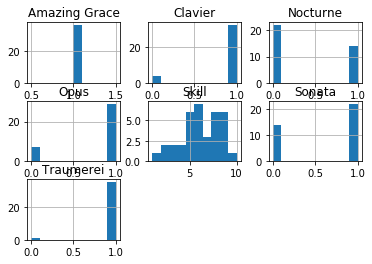

In [6]:
dataset.hist()
plt.show()

In [20]:
# Split-out validation dataset
array = data.values
X = array[:,1]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
data.head()

,Skill,Num Pieces
0,4.0,4.0
1,2.0,2.0
2,5.0,5.0
3,10.0,6.0
4,6.0,5.0


In [21]:
seed = 7
scoring = 'accuracy'

In [22]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\Samy Hay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 25]